In [1]:
import random_walker as rw
import utils
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [2]:
offspring_factor=3
height=4
H=nx.generators.classic.balanced_tree(offspring_factor,height)
root=utils.list_degree_nodes(H,offspring_factor,1)[0]
H,_=utils.directify(H,root)

0


/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.it

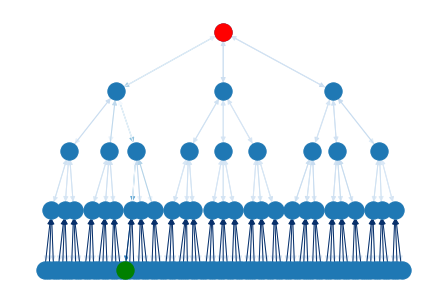

In [3]:
G=rw.patternWalker(H,root,50,5/50)
G.set_weights()
print(G.num_pattern_duplicates())
pos=graphviz_layout(G,prog='dot')
(edges,weights) = zip(*nx.get_edge_attributes(G,'prob').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g')
plt.show()

[[1.         0.95576401]
 [0.95576401 1.        ]]


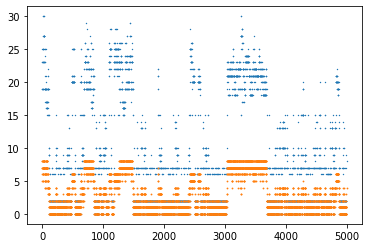

In [4]:
#G.x=G.target_node.copy()
distances=[]
lengths=[]
for _ in range(5000):
    G.step()
    #print(G.x,G.nodes[G.x]['pattern'])
    distances.append( G.metric(G.target_pattern,G.nodes[G.x]['pattern']) )
    lengths.append( nx.shortest_path_length(G,G.target_node,G.x) )
print(np.corrcoef(distances,lengths))
plt.plot(distances,'x',ms=0.8)
plt.plot(lengths,'o',ms=0.8)
plt.show()


(array([2431.,    0.,  562.,  329.,   89.,  173.,  497.,  661.,  205.,
          53.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

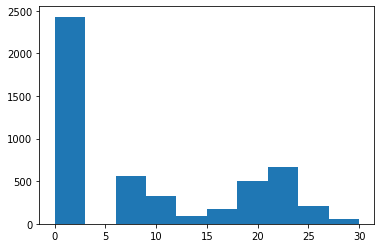

In [5]:
plt.hist(distances)

In [6]:
a=[G.metric(G.nodes[x]['pattern'],G.target_pattern) for x in G.nodes]
b=[nx.shortest_path_length(G,x,G.target_node) for x in G.nodes]

array([[1.        , 0.70895088],
       [0.70895088, 1.        ]])

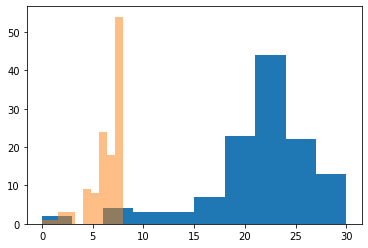

In [7]:
plt.hist(a)
plt.hist(b,alpha=0.5)
np.corrcoef(a,b)

/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([117.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.00076443+0.j, 0.03149446+0.j, 0.0622245 +0.j, 0.09295453+0.j,
        0.12368457+0.j, 0.1544146 +0.j, 0.18514464+0.j, 0.21587467+0.j,
        0.24660471+0.j, 0.27733474+0.j, 0.30806478+0.j]),
 <a list of 10 Patch objects>)

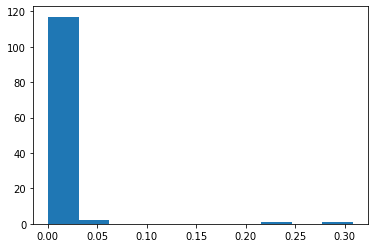

In [8]:
pi=utils.largest_eigenvector(G,'prob')
plt.hist(pi)

In [9]:
pi[G.target_node]

(0.22117471303553837+0j)

In [10]:
for x in G.predecessors(G.target_node):
    print(pi[x])

(0.30806477887092903+0j)


Testing an idea for a "symmetrised" (as in "can be negative" transient process):

In [1]:
import numpy as np


def probs(k,gamma):
    if k==0:
        return np.array([0.5,0,0.5])
    else:
        out=np.array([gamma/(abs(k-1)+1),(1-gamma)/(abs(k)+1),gamma/(abs(k+1)+1)])
        return out/np.sum(out)

In [5]:
gamma=0.2
d=[0]
last=0
for _ in range(50000):
    current=np.random.choice([last-1,last,last+1],p=probs(last,gamma))
    d.append(current)
    last=current.copy()

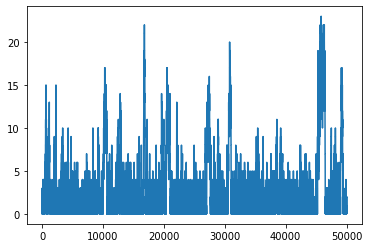

In [6]:
import matplotlib.pyplot as plt
plt.plot([abs(x) for x in d])
plt.show()

(array([3.600e+01, 6.200e+01, 6.100e+01, 9.100e+01, 7.500e+01, 1.500e+02,
        1.580e+02, 1.570e+02, 5.210e+02, 2.720e+02, 2.990e+02, 4.010e+02,
        3.850e+02, 3.930e+02, 5.400e+02, 7.000e+02, 1.903e+03, 1.952e+03,
        4.163e+03, 9.951e+03, 5.925e+03, 9.763e+03, 4.193e+03, 2.297e+03,
        2.245e+03, 6.570e+02, 5.600e+02, 3.660e+02, 3.060e+02, 2.790e+02,
        2.370e+02, 2.540e+02, 2.940e+02, 5.500e+01, 9.300e+01, 6.000e+01,
        7.600e+01, 4.600e+01, 8.000e+00, 1.700e+01]),
 array([-23.   , -21.875, -20.75 , -19.625, -18.5  , -17.375, -16.25 ,
        -15.125, -14.   , -12.875, -11.75 , -10.625,  -9.5  ,  -8.375,
         -7.25 ,  -6.125,  -5.   ,  -3.875,  -2.75 ,  -1.625,  -0.5  ,
          0.625,   1.75 ,   2.875,   4.   ,   5.125,   6.25 ,   7.375,
          8.5  ,   9.625,  10.75 ,  11.875,  13.   ,  14.125,  15.25 ,
         16.375,  17.5  ,  18.625,  19.75 ,  20.875,  22.   ]),
 <a list of 40 Patch objects>)

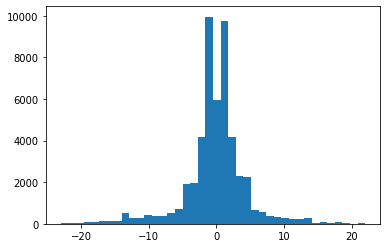

In [9]:
plt.hist(d,bins=40)